# MAIS202 Project
### Gargi Singh and Jehan Dastoor

![To make your day better :)](https://media.gettyimages.com/videos/close-up-baboon-making-noise-on-telephone-video-id712-17?s=640x640)


In [1]:
!pip install tf-nightly
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tqdm import tqdm

The idea of the project is to categorize skin lesions based on the kind of cancer they are. The project will consist of a few major components:

1) Importing and pre-processing the images by transformation (to increase the size of the dataset).

2) Creating our model, i.e. deciding our layers that we are going to use (possibly based off an already built tensorflow model).

3) Training the model.

4) Testing the model using our test data set.

##1. Importing and pre-processing the data

In [2]:
#Importing our data
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

#First, finding what the right diagnosis type would be for the different cancer types
traindf = pd.read_csv("/content/drive/MyDrive/MAIS/ISIC2018_Task3_Training_LesionGroupings.csv")

def append_ext(fn):
    return fn+".jpg"

traindf["image"]=traindf["image"].apply(append_ext)
datagen = ImageDataGenerator(rescale=1./255.,
                             validation_split=0.2)

train_generator = datagen.flow_from_dataframe(dataframe=traindf,
                                              directory="/content/drive/MyDrive/MAIS/ISIC2018_Task3_Training_Input",
                                              x_col="image",
                                              y_col="diagnosis_confirm_type",
                                              subset="training",
                                              batch_size=32,
                                              color_mode="rgb",
                                              shuffle=True,
                                              class_mode="categorical",
                                              target_size=(64,64))

valid_generator = datagen.flow_from_dataframe(dataframe=traindf,
                                              directory="/content/drive/MyDrive/MAIS/ISIC2018_Task3_Training_Input",
                                              x_col="image",
                                              y_col="diagnosis_confirm_type",
                                              subset="validation",
                                              batch_size=32,
                                              color_mode="rgb",
                                              shuffle=True,
                                              class_mode="categorical",
                                              target_size=(64,64))

Found 8012 validated image filenames belonging to 4 classes.
Found 2003 validated image filenames belonging to 4 classes.


In [37]:
#Finding what the actual cancer type is from the categorical data
traindfcanc = pd.read_csv("/content/drive/MyDrive/MAIS/ISIC2018_Task3_Training_GroundTruth/ISIC2018_Task3_Training_GroundTruth.csv")
traindfcanc["image"]=traindfcanc["image"].apply(append_ext)

column_names = traindfcanc.columns.to_list()[1:]

datagen_canc = ImageDataGenerator(rescale=1./255.,
                             validation_split=0.2)

train_generator_canc = datagen_canc.flow_from_dataframe(dataframe=traindfcanc,
                                              directory="/content/drive/MyDrive/MAIS/ISIC2018_Task3_Training_Input",
                                              x_col="image",
                                              y_col=list(column_names),
                                              subset="training",
                                              batch_size=32,
                                              color_mode="rgb",
                                              shuffle=True,
                                              class_mode="raw",
                                              target_size=(64,64))

valid_generator_canc = datagen_canc.flow_from_dataframe(dataframe=traindfcanc,
                                              directory="/content/drive/MyDrive/MAIS/ISIC2018_Task3_Training_Input",
                                              x_col="image",
                                              y_col=list(column_names),
                                              subset="validation",
                                              batch_size=32,
                                              color_mode="rgb",
                                              shuffle=True,
                                              class_mode="raw",
                                              target_size=(64,64))

Found 8012 validated image filenames.
Found 2003 validated image filenames.


##2.a) Creating the Model for Diagnosis Type

In [3]:
#Building the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4))

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5

##3.a) Training for Diagnosis Type

In [4]:
#Running the Model
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

model.fit_generator(generator=train_generator,
        steps_per_epoch=STEP_SIZE_TRAIN,
        epochs=10,
        validation_data=valid_generator,
        validation_steps=STEP_SIZE_VALID,
        verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1909: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
250/250 [==============================] - 2265s 9s/step - loss: 0.6497 - categorical_accuracy: 0.7477 - val_loss: 0.4069 - val_categorical_accuracy: 0.8821
Epoch 2/10
250/250 [==============================] - 93s 373ms/step - loss: 0.4167 - categorical_accuracy: 0.8682 - val_loss: 0.3807 - val_categorical_accuracy: 0.8841
Epoch 3/10
250/250 [==============================] - 92s 370ms/step - loss: 0.3995 - categorical_accuracy: 0.8683 - val_loss: 0.3565 - val_categorical_accuracy: 0.8886
Epoch 4/10
250/250 [==============================] - 92s 367ms/step - loss: 0.3640 - categorical_accuracy: 0.8804 - val_loss: 0.3541 - val_categorical_accuracy: 0.8851
Epoch 5/10
250/250 [==============================] - 92s 369ms/step - loss: 0.3738 - categorical_accuracy: 0.8712 - val_loss: 0.3468 - val_categorical_accuracy: 0.8972
Epoch 6/10
250/250 [==============================] - 92s 370ms/step - loss: 0.3332 - categorical_accuracy: 0.8822 - val_loss: 0.3592 - val_categorical_accu

In [6]:
#Saving our model
model.save("test_model.h5")

In [8]:
#Evaluating our model
model.evaluate_generator(train_generator,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1942: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


251/251 [==============================] - 74s 295ms/step - loss: 0.3451 - categorical_accuracy: 0.8823


[0.3450883626937866, 0.8823015689849854]

##2.b) Creating the Model for Cancer Type

In [38]:
#Building the model
model_canc = Sequential()
model_canc.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_canc.add(MaxPooling2D((2, 2)))
model_canc.add(Conv2D(64, (3, 3), activation='relu'))
model_canc.add(MaxPooling2D((2, 2)))
model_canc.add(Conv2D(64, (3, 3), activation='relu'))

model_canc.add(Flatten())
model_canc.add(Dense(64, activation='relu'))
model_canc.add(Dense(7))

model_canc.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])
model_canc.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

##3.b) Training the Model for Cancer Type

In [39]:
#Running the Model
STEP_SIZE_TRAIN_CANC=train_generator_canc.n//train_generator_canc.batch_size
STEP_SIZE_VALID_CANC=valid_generator_canc.n//valid_generator_canc.batch_size

cancer = model_canc.fit_generator(generator=train_generator_canc,
        steps_per_epoch=STEP_SIZE_TRAIN_CANC,
        epochs=10,
        validation_data=valid_generator_canc,
        validation_steps=STEP_SIZE_VALID_CANC,
        verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1909: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
250/250 [==============================] - 92s 367ms/step - loss: 1.0879 - categorical_accuracy: 0.6712 - val_loss: 0.9237 - val_categorical_accuracy: 0.6870
Epoch 2/10
250/250 [==============================] - 91s 364ms/step - loss: 0.9097 - categorical_accuracy: 0.6755 - val_loss: 0.8601 - val_categorical_accuracy: 0.6991
Epoch 3/10
250/250 [==============================] - 91s 365ms/step - loss: 0.8802 - categorical_accuracy: 0.6800 - val_loss: 0.8575 - val_categorical_accuracy: 0.7228
Epoch 4/10
250/250 [==============================] - 91s 366ms/step - loss: 0.8121 - categorical_accuracy: 0.6984 - val_loss: 0.7716 - val_categorical_accuracy: 0.7218
Epoch 5/10
250/250 [==============================] - 91s 365ms/step - loss: 0.7961 - categorical_accuracy: 0.7090 - val_loss: 0.7317 - val_categorical_accuracy: 0.7394
Epoch 6/10
250/250 [==============================] - 91s 365ms/step - loss: 0.7357 - categorical_accuracy: 0.7226 - val_loss: 0.7780 - val_categorical_acc

In [40]:
#Saving our model
model_canc.save("test_model_canc.h5")

In [41]:
#Evaluating our model
model_canc.evaluate_generator(train_generator_canc,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1942: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


251/251 [==============================] - 73s 291ms/step - loss: 0.4912 - categorical_accuracy: 0.8201


[0.4911623001098633, 0.820144772529602]

###Plotting the results of our cancer type training so we can visualise our progress better.

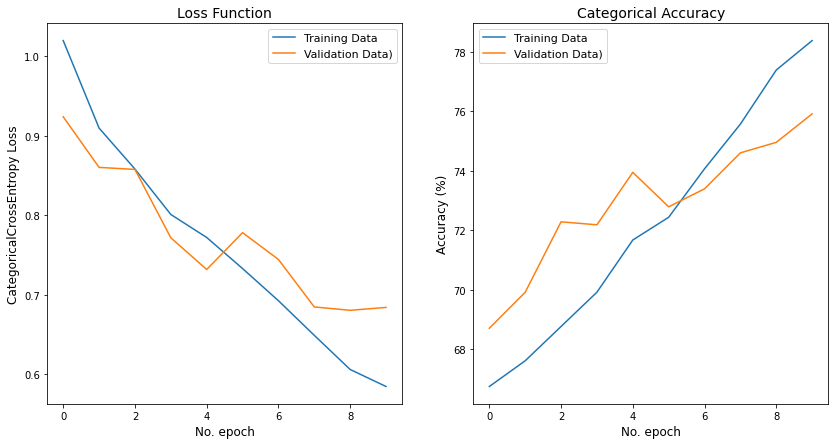

In [60]:
#Creating plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.plot(cancer.history['loss'], label='Training Data')
ax1.plot(cancer.history['val_loss'], label='Validation Data)')
ax1.set_title('Loss Function', fontsize=14)
ax1.set_ylabel('CategoricalCrossEntropy Loss', fontsize=12)
ax1.set_xlabel('No. epoch', fontsize=12)
ax1.legend(loc="upper right", fontsize=11)

ax2.plot([100*i for i in cancer.history['categorical_accuracy']], label='Training Data')
ax2.plot([100*i for i in cancer.history['val_categorical_accuracy']], label='Validation Data)')
ax2.set_title('Categorical Accuracy', fontsize=14)
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.set_xlabel('No. epoch', fontsize=12)
ax2.legend(loc="upper left", fontsize=11)

plt.savefig("Model_plots.png", bbox_inches="tight", dpi=200)
plt.show()